In [1]:
import pdfplumber

[['Venda disponível', 'R$ 0,00', '', 'ISS', '-R$ 0,30', '', 'Taxa Registro BMF', '-R$ 0,34', '', 'Total dos negócios', 'R$ 55,00'], ['Compra disponível', 'R$ 0,00', '', 'PIS', '-R$ 0,05', '', 'Taxa Emolumentos BMF', '-R$ 0,16', '', 'Tributos', '-R$ 1,08'], ['Vendas opções', 'R$ 0,00', '', 'COFINS', '-R$ 0,24', '', 'Taxa Operacional', '-R$ 5,50', '', 'Custos', '-R$ 6,00'], ['Compras opções', 'R$ 0,00', '', 'IRRF Operação Comum *', 'R$ 0,00', '', 'Total de custos', '-R$ 6,00', '', 'TOTAL LÍQUIDO', 'R$ 47,92'], ['Ajustes da posição', 'R$ 0,00', '', 'IRRF Day Trade (Projeção)', '-R$ 0,49', '', '', '', '', '', ''], ['Ajuste encerra hoje', 'R$ 55,00', '', 'Total de Tributos', '-R$ 1,08', '', '', '', '', '', ''], ['Total de negócios', 'R$ 55,00', '', '', '', '', '', '', '', '', '']]
{'Nome Completo': 'GÉRSON DE OLIVEIRA BENEDITO', 'Conta': '202718', 'Data_de_referencia': '17/10/2019', 'Comprovante': '194367', 'Titulo_da_nota': 'COMPROVANTE BM&F', 'Resumo': {'VOLUME FINANCEIRO E AJUSTES': {'Ve

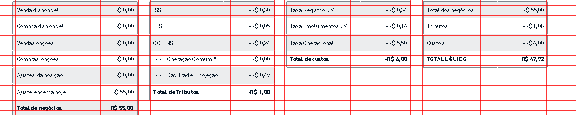

In [44]:
import pdfplumber

with pdfplumber.open("Toro - Futuro.pdf") as pdf:
    page = pdf.pages[0]
    coluna_resumo = page.crop((20, 155, page.width, 270))
    all_text = ""
    text = page.extract_text()
    for row in text:
        all_text += text
    row = all_text.split('\n')
    
    resumo_settings = {
        "vertical_strategy": "explicit",
        "horizontal_strategy": "text",
        "explicit_horizontal_lines": [160, 170, 190, 210, 220, 240, 255, 265],
        "explicit_vertical_lines": [35, 120, 158, 170, 250, 294, 304, 370, 430, 442, 500, 566]
    }
    table_resumo = coluna_resumo.extract_table(resumo_settings)
    
    i = 0
    lista_resumo = []
    while i <= len(table_resumo) - 1:
        if table_resumo[i][0] != '':
            lista_resumo.append(table_resumo[i])
        i += 1
    print(lista_resumo)
    
    titulo = row[2].split()
    obj_nota = {
        "Nome Completo": row[0],
        "Conta": titulo[1],
        "Data_de_referencia": titulo[2],
        "Comprovante": titulo[3],
        "Titulo_da_nota": row[3],
        "Resumo": {
            "VOLUME FINANCEIRO E AJUSTES": {
                lista_resumo[0][0]: lista_resumo[0][1],
                lista_resumo[1][0]: lista_resumo[1][1],
                lista_resumo[2][0]: lista_resumo[2][1],
                lista_resumo[3][0]: lista_resumo[3][1],
                lista_resumo[4][0]: lista_resumo[4][1],
                lista_resumo[5][0]: lista_resumo[5][1],
                lista_resumo[6][0]: lista_resumo[6][1]
            },
            "TRIBUTOS": {
                lista_resumo[0][3]: lista_resumo[0][4],
                lista_resumo[1][3]: lista_resumo[1][4],
                lista_resumo[2][3]: lista_resumo[2][4],
                lista_resumo[3][3]: lista_resumo[3][4],
                lista_resumo[4][3]: lista_resumo[4][4],
                lista_resumo[5][3]: lista_resumo[5][4]
            },
            "CUSTOS": {
                lista_resumo[0][6]: lista_resumo[0][7],
                lista_resumo[1][6]: lista_resumo[1][7],
                lista_resumo[2][6]: lista_resumo[2][7],
                lista_resumo[3][6]: lista_resumo[3][7],
            },
            "RESULTADO": {
                lista_resumo[0][9]: lista_resumo[0][10],
                lista_resumo[1][9]: lista_resumo[1][10],
                lista_resumo[2][9]: lista_resumo[2][10],
                lista_resumo[3][9]: lista_resumo[3][10],
            }
        }
    }
    print(obj_nota)
    
im = coluna_resumo.to_image()
im.draw_vlines([35, 120, 158, 170, 250, 294, 304, 370, 430, 442, 500, 566])
im.draw_hlines([160, 170, 190, 210, 220, 240, 255, 265])

{'Título': 'WINFUT', 'Quantidade_total_de_compra': '1', 'Preço médio compra': 'R$ 105.990,0000', 'Quantidade_total_de_venda': {'1'}, 'Preço médio venda': 'R$ 106.265,0000', 'negocio_1': {'CV': 'VENDA', 'Vencimento': 'Z19', 'Quantidade': '1', 'Preco_Ajuste': 'R$ 106.265,0000', 'Tipo_de_negocio': 'DAY TRADE', 'Valor_Operacao': 'R$ 103,00', 'Taxa_Operacao': 'R$ 0,00'}, 'negocio_2': {'CV': 'COMPRA', 'Vencimento': 'Z19', 'Quantidade': '1', 'Preco_Ajuste': 'R$ 105.990,0000', 'Tipo_de_negocio': 'DAY TRADE', 'Valor_Operacao': '-R$ 48,00', 'Taxa_Operacao': 'R$ 5,50'}}


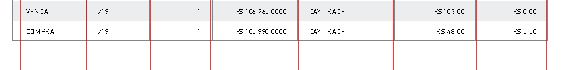

In [88]:
    coluna_detalhes = page.crop((20, 430, page.width, 500))
    detalhes_settings = {
        "vertical_strategy": "explicit",
        "horizontal_strategy": "lines",
        "explicit_vertical_lines": [40, 106, 170, 230, 318, 413, 496, 566]
    }
    table_detalhes = coluna_detalhes.extract_table(detalhes_settings)
    linha14 = row[14].split()
    linha15 = row[15].split()
    total_detalhes = {
        "Título": linha14[0],
        "Quantidade_total_de_compra": linha14[5],
        "Preço médio compra": f"{linha14[9]} {linha15[0]}",
        "Quantidade_total_de_venda": {linha14[14]},
        "Preço médio venda": f"{linha14[-1]} {linha15[-1]}"
    }
    total_negocios = 0
    while total_negocios <= len(table_detalhes) - 1:
        soma = total_negocios + 1
        negocio = {
            "CV": table_detalhes[total_negocios][0],
            "Vencimento": table_detalhes[total_negocios][1],
            "Quantidade": table_detalhes[total_negocios][2],
            "Preco_Ajuste": table_detalhes[total_negocios][3],
            "Tipo_de_negocio": table_detalhes[total_negocios][4],
            "Valor_Operacao": table_detalhes[total_negocios][5],
            "Taxa_Operacao": table_detalhes[total_negocios][6],
        }
        total_detalhes[f"negocio_{soma}"] = negocio 
        total_negocios += 1
    print(total_detalhes)
im = coluna_detalhes.to_image()
im.draw_vlines([40, 106, 170, 230, 318, 413, 496, 566])
im.draw_hlines([])

In [101]:
    linha19 = row[19].split()
    linha20 = row[20].split()
    
    total_increment = 12
    nome = ''
    while total_increment <= 26:
        nome += f" {linha19[total_increment]}"
        total_increment += 1
    ouvidoria = row[-3].split('Ouvidoria:')
    obj_especificacoes = {
        "IRRF_Day_Trade": {
            "Base": f"{linha19[7]} {linha19[8]}",
            "Projeção": f"{linha19[10]} {linha19[11]}",
            "obs": nome
        },
        "IRRF_Operacao_Comum": {
            "Base": linha20[4],
            "Projeção": linha20[6],
            "obs": row[21],
        },
        "informação adicional": f"{row[22]} {row[23]} {row[24]} {row[25]} {row[26]} {row[27]} {row[28]}",
        "Ouvidoria": ouvidoria[-1],
        "Dias_uteis": row[-2],
        "Página": row[-1]
    }
    print(obj_especificacoes)

    print(row[22])
    

{'IRRF_Day_Trade': {'Base': 'R$ 55,00', 'Projeção': '-R$ 0,49', 'obs': ' O valor do IRRF s/ Day Trade já está descontado do Líquido da Nota .'}, 'IRRF_Operacao_Comum': {'Base': 'R$0,00', 'Projeção': 'R$0,00.', 'obs': 'IRRF Operação Comum é debito somente quando atinge o valor superior a R$ 1,00 (um real)'}, 'informação adicional': '- Estas informações são confidenciais e destinadas a indivíduo e propósito específicos, sendo protegidas por lei. Caso você não seja a pessoa a quem foi dirigido este documento, deve apagá-lo. É terminantemente proibida a utilização, acesso, cópia ou divulgação não autorizada destas informações. Ressaltamos que a nota de corretagem é elaborada a partir de diversas fontes de consulta e estas informações são atualizadas em diferentes momentos. Sendo assim, as informações constantes neste documento podem sofrer alterações a qualquer momento e, quando da consulta, apresentarem alguma defasagem. Os valores de corretagem e os tributos incidentes (ISS/PIS/COFINS, c